### KNN 최근접 이웃 알고리즘

- 붓꽃 데이터 셋

  : 데이터 적재
  
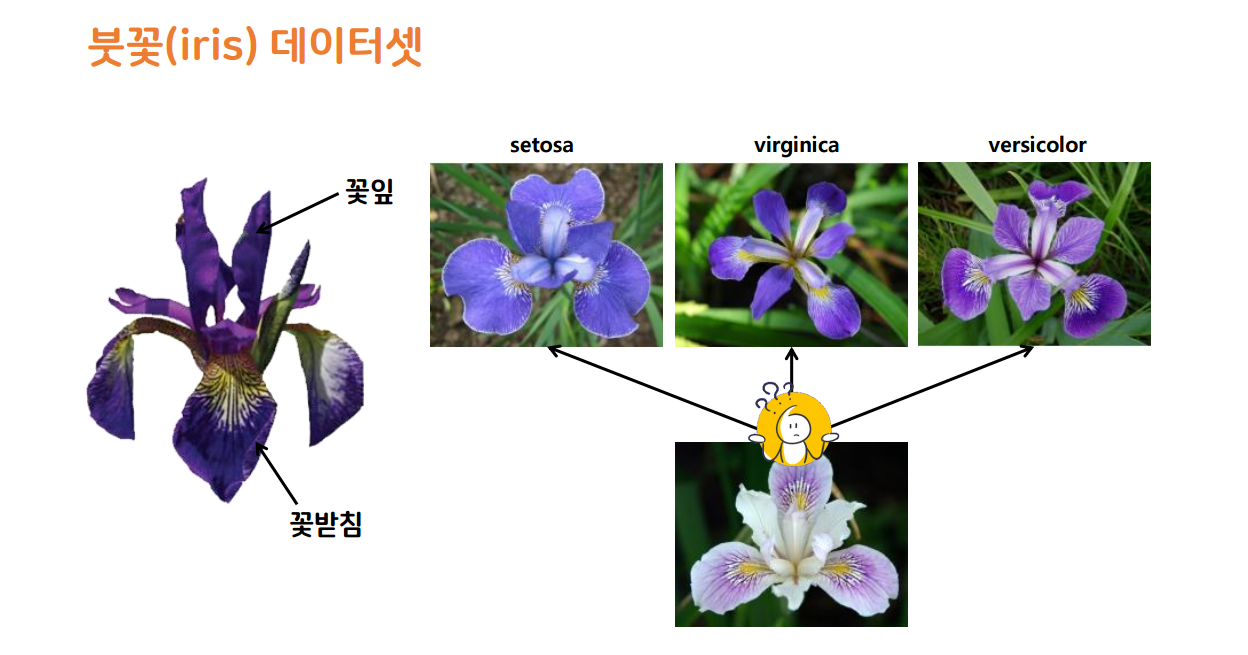

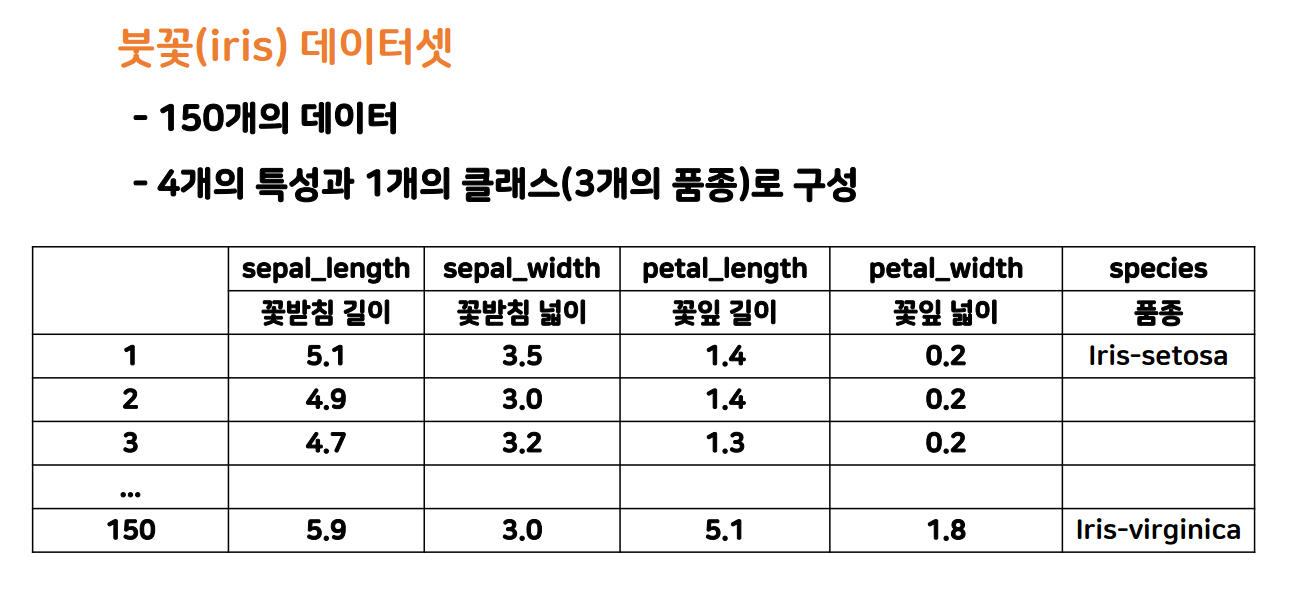

In [77]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris_dataset = load_iris()      # 붓꽃 데이터를 로드한다.

In [78]:
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [79]:
iris_dataset['target_names']    # 붓꽃의 품종을 출력해본다.

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [80]:
iris_dataset['feature_names']   # 붓꽃의 특성을 출력해본다.

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [81]:
iris_dataset['data'][:5]       # 봇꽃 데이터의 5개만 출력해본다.
                               # 주요 특성 데이터는 data 열에 저장되어 있다.

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [82]:
iris_dataset['target']  

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [83]:
iris_dataset['target'].shape

(150,)

### 훈련데이터와 테스트 데이터를 분리한다.

In [84]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], 
                                                      iris_dataset['target'],
                                                      test_size = 0.3, #지정안하면 자동으로 7:3,
                                                      random_state=0)

In [85]:
X_train.shape

(105, 4)

In [86]:
X_test.shape

(45, 4)

In [87]:
y_train.shape

(105,)

In [88]:
y_test.shape

(45,)

### 데이터를 분석 해 보자!

- 산점도 그래프를 그리자

- Pandas 라이브러리를 활용하기 위해 Dataframe을 만들고 데이터를 변환한다.

In [90]:
import pandas as pd

iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)
iris_dataframe.head()  # 상위 5개 뽑기

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.0,2.0,3.5,1.0
1,6.5,3.0,5.5,1.8
2,6.7,3.3,5.7,2.5
3,6.0,2.2,5.0,1.5
4,6.7,2.5,5.8,1.8


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F59A42EDC8>,
      dtype=object)

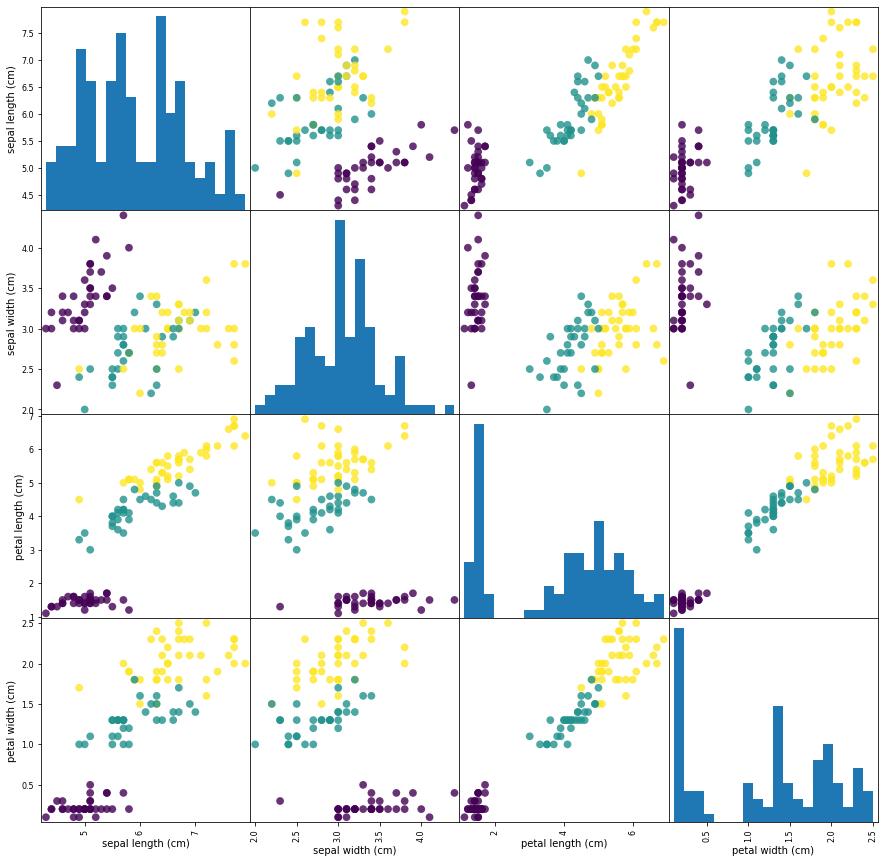

In [91]:
pd.plotting.scatter_matrix(iris_dataframe, c = y_train,
                          figsize = (15,15), marker = 'o', hist_kwds = {'bins':20},
                          s = 60, alpha = 0.8)

### KNN 분류 알고리즘 적용

In [92]:
from sklearn.neighbors import KNeighborsClassifier

### 모델생성

In [93]:
knn_model_iris = KNeighborsClassifier(n_neighbors = 1)

### 학습 수행

In [94]:
knn_model_iris.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [95]:
knn_model_iris.score(X_test, y_test)

0.9777777777777777

### 사용자 데이터를 입력해보자

In [96]:
import numpy as np         #array로 넘겨야하므로 numpy 사용

# 꽃받침의 길이가 5cm, 폭이 2.9cm, 꽃잎의 길이가 1cm, 폭이 0.2cm인 붓꽃의 품종을 보았을 때 예측은??? 

my_data = np.array([[5, 2.9, 1, 0.2]])
#knn_model_iris.predict([[5, 2.9, 1, 0.2]])
my_dict = knn_model_iris.predict(my_data)
iris_dataset['target_names'][my_dict]

array(['setosa'], dtype='<U10')

In [98]:
knn_model_iris.score(X_train, y_train)

1.0

### 임의의 특성 2개를 이용하여 평가하기

In [99]:
X_train, X_test , y_train, y_test = train_test_split(iris_dataset['data'][:, :2], # train_test_split 함수 사용, (문제, 정답 )
                                                     iris_dataset['target'],
                                                     #test_size = 0.3,
                                                     random_state = 0)

In [100]:
X_train.shape

(112, 2)

In [101]:
knn_model_iris2 = KNeighborsClassifier(n_neighbors = 1)
knn_model_iris2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [102]:
knn_model_iris2.score(X_train, y_train)

0.9375

In [103]:
# 꽃받침의 길이가 10cm, 폭이 2.9cm인 붓꽃을 보았을 때 품종은?

my_iris = np.array([[10, 2.9]])

prediction = knn_model_iris2.predict(my_iris)
iris_dataset['target_names'][prediction]

array(['virginica'], dtype='<U10')

In [104]:
y_pred = knn_model_iris2.predict( X_test )
y_pred #정답 데이터 예측

array([1, 2, 0, 2, 0, 1, 0, 1, 2, 1, 2, 2, 1, 2, 1, 0, 2, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2])

In [105]:
knn_model_iris2.score(X_test, y_test)

0.7105263157894737

### 하이퍼 파라미터 튜닝을 해보자

In [106]:
from sklearn import metrics

test_list = []
train_list = []

for k in range(1,105, 2) : 
    m = KNeighborsClassifier(n_neighbors=k)
    m.fit(X_train , y_train)
    
    test_pre = m.predict(X_test)
    test_score = metrics.accuracy_score(test_pre, y_test)
    test_list.append(test_score)
    
    train_pre = m.predict(X_train)
    train_score = metrics.accuracy_score(train_pre, y_train)
    train_list.append(train_score)

### 시각화를 수행해보자

In [107]:
import matplotlib.pyplot as plt

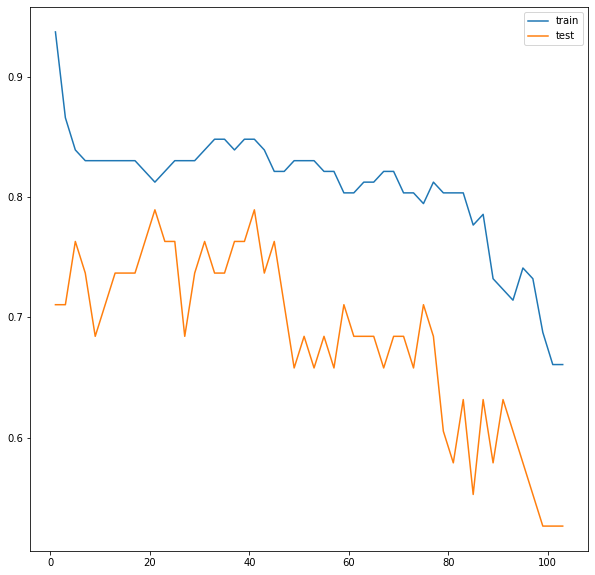

In [108]:
plt.figure(figsize = (10,10))
plt.plot(range(1,105,2), train_list, label = 'train')
plt.plot(range(1,105,2), test_list, label = 'test')
plt.legend()
plt.show()

In [110]:
!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582645 sha256=04e569458bf2218c2fa0ab41b5aa3d4dd5855f7bee931e52f5f486bc6f5df07c
  Stored in directory: c:\users\smt078\appdata\local\pip\cache\wheels\f1\17\e1\1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


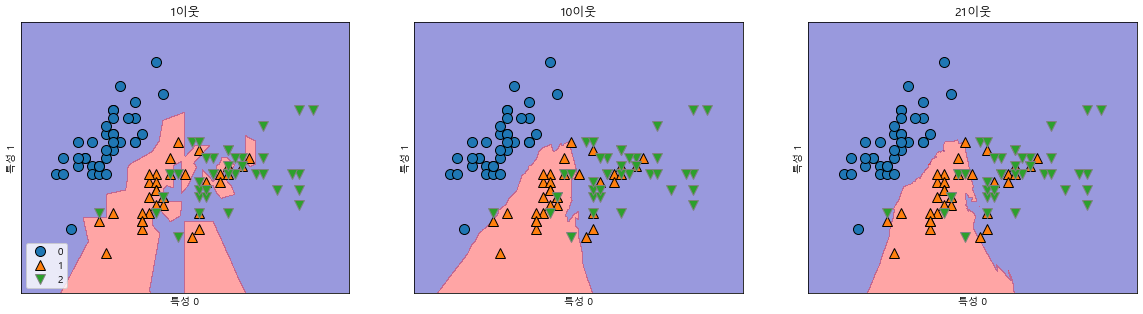

In [116]:
import mglearn
fig, axes = plt.subplots(1,3,figsize = (20, 5))

for n_neighbors, ax in zip([1,10,21], axes):      #이웃이 1개일때, 10개일때, 21개일때를... 반복
   
    #clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    k_model = KNeighborsClassifier(n_neighbors = n_neighbors)  #모델을 만든 후 바로.fit 사용 가능
    clf = k_model.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(clf, X_train, fill = True, eps = 0.5, ax = ax, alpha = 0.4)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
    ax.set_title("{}이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")

axes[0].legend(loc = 3)

## 유방암 데이터셋

In [117]:
from sklearn.datasets import load_breast_cancer

#데이터 로드
cancer = load_breast_cancer()

cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [118]:
cancer.data.shape  #전체데이터569개 특성값30개

(569, 30)

In [120]:
import numpy as np
for n, v in zip(cancer.target_names, np.bincount(cancer.target)):
    print({n:v})

{'malignant': 212}
{'benign': 357}


In [121]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

#### 훈련시키기

In [122]:
#훈련데이터와 테스트데이터 분리 작업
X_train, X_test, y_train, y_test = train_test_split( cancer.data,
                                                     cancer.target,
                                                     random_state = 0)

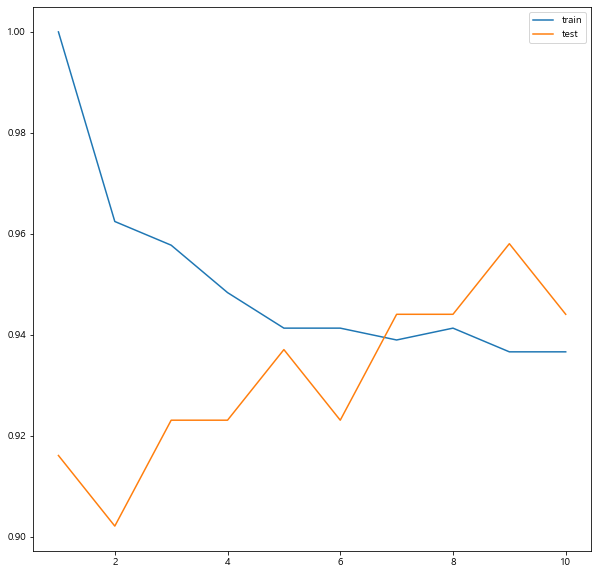

In [132]:
from sklearn import metrics

test_list2 = []
train_list2 = []

for k in range(1,11) : 
    m = KNeighborsClassifier(n_neighbors=k)
    m.fit(X_train , y_train)
    
    #test_pre = m.predict(X_test)
    #test_score = metrics.accuracy_score(test_pre, y_test)
    test_score = m.score(X_test,y_test)
    test_list2.append(test_score)
    
    #train_pre = m.predict(X_train)
    #train_score = metrics.accuracy_score(train_pre, y_train)
    train_score = m.score(X_train, y_train)
    train_list2.append(train_score)
    
    
plt.figure(figsize = (10,10))
plt.plot(range(1,11), train_list2, label = 'train')
plt.plot(range(1,11), test_list2, label = 'test')
plt.legend()
plt.show()

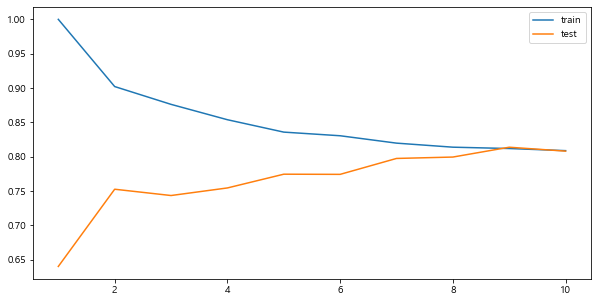

In [133]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor

test_list2 = []
train_list2 = []

for k in range(1,11) : 
    m = KNeighborsRegressor(n_neighbors=k)
    m.fit(X_train , y_train)
    
    #test_pre = m.predict(X_test)
    #test_score = metrics.accuracy_score(test_pre, y_test)
    test_score = m.score(X_test,y_test)
    test_list2.append(test_score)
    
    #train_pre = m.predict(X_train)
    #train_score = metrics.accuracy_score(train_pre, y_train)
    train_score = m.score(X_train, y_train)
    train_list2.append(train_score)
    
    
plt.figure(figsize = (10,5))
plt.plot(range(1,11), train_list2, label = 'train')
plt.plot(range(1,11), test_list2, label = 'test')
plt.legend()
plt.show()